# Import libraries and load data

In [17]:
import pandas as pd # pandas for data import and handling
import statsmodels.api as sm # statsmodels for OLS estimation and prediction
import numpy as np # numpy for auxiliary functions

In [2]:
snp500 = pd.read_csv('GSPC.csv') # import daily S&P 500 data

# Exploratory data analysis

In [3]:
snp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000
1,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000
2,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000
3,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000
4,1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000


In [4]:
snp500.describe() # summary statistics

,Open,High,Low,Close,Adj Close,Volume
count,17311.000000,17311.000000,17311.000000,17311.000000,17311.000000,1.731100e+04
mean,562.607749,565.917851,559.110741,562.733054,562.733054,9.114776e+08
std,667.818767,671.159450,664.203455,667.917970,667.917970,1.539713e+09
min,16.660000,16.660000,16.660000,16.660000,16.660000,6.800000e+05
25%,85.739998,86.405003,85.024998,85.744999,85.744999,8.850000e+06
50%,165.550003,166.380005,164.850006,165.550003,165.550003,9.121000e+07
75%,1090.205017,1097.244995,1080.460022,1090.059998,1090.059998,1.168950e+09
max,2936.760010,2940.909912,2927.110107,2930.750000,2930.750000,1.145623e+10


# Estimate simple AR(1) model for S&P 500 daily returns

In [5]:
snp500['Return'] = snp500.Close.pct_change() # calculate daily returns

In [6]:
snp500['LaggedReturn'] = snp500.Return.shift(-1) # get lagged return series (one day lag)

In [7]:
snp500 = snp500.dropna() # remove missing values

In [8]:
snp500 = sm.add_constant(snp500) # add constant to dataframe

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
# create dependent and independent variables
y = snp500.Return; # dependent variable
X = snp500[['const','LaggedReturn']] # independent variables

In [10]:
# build and estimate AR(1) model for daily returns
ar_one = sm.OLS(y,X).fit()

In [11]:
# show estimation results
ar_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     11.57
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           0.000672
Time:                        21:15:38   Log-Likelihood:                 55857.
No. Observations:               17309   AIC:                        -1.117e+05
Df Residuals:                   17307   BIC:                        -1.117e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0003    7.3e-05      4.571      0.000       0.000       0.000
LaggedReturn     0.0258      0.008      3.401      0.001       0.011       0.041
==============================================================================
Omnibus:                     5416.057   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           331300.426
Skew:                          -0.672   Prob(JB):                         0.00
Kurtosis:                      24.391   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

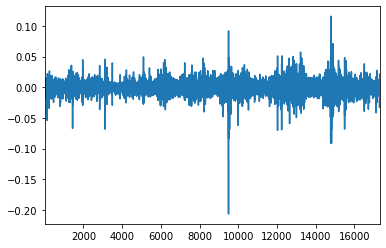

In [13]:
# plot regression residuals
p = ar_one.resid.plot()